Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='Windows-1252')

# Display the first few rows of the dataset
print(df.head())

# Check for any missing values
print(df.isnull().sum())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [6]:
# Select relevant numerical columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df_clustering = df[features]

# Check the cleaned dataset
print(df_clustering.head())

   QUANTITYORDERED  PRICEEACH    SALES  MSRP
0               30      95.70  2871.00    95
1               34      81.35  2765.90    95
2               41      94.74  3884.34    95
3               45      83.26  3746.70    95
4               49     100.00  5205.27    95


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

C:\Users\Aditya Nimase\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aditya Nimase\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538

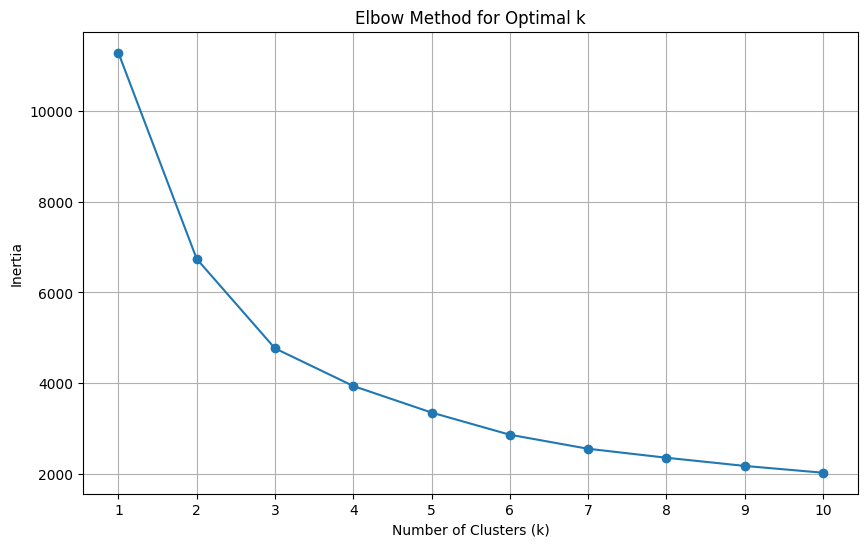

In [8]:
# Elbow Method
inertia = []
k_range = range(1, 11)  # Test from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [9]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_init=10,random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
 [[  43.7201426    73.22827094 3199.87871658   75.98217469]
 [  27.35376344   96.52260215 3157.94496774  114.73225806]
 [  43.22836879   99.56446809 6069.53652482  135.97446809]
 [  29.70494418   56.02558214 1629.32188198   62.40988836]]


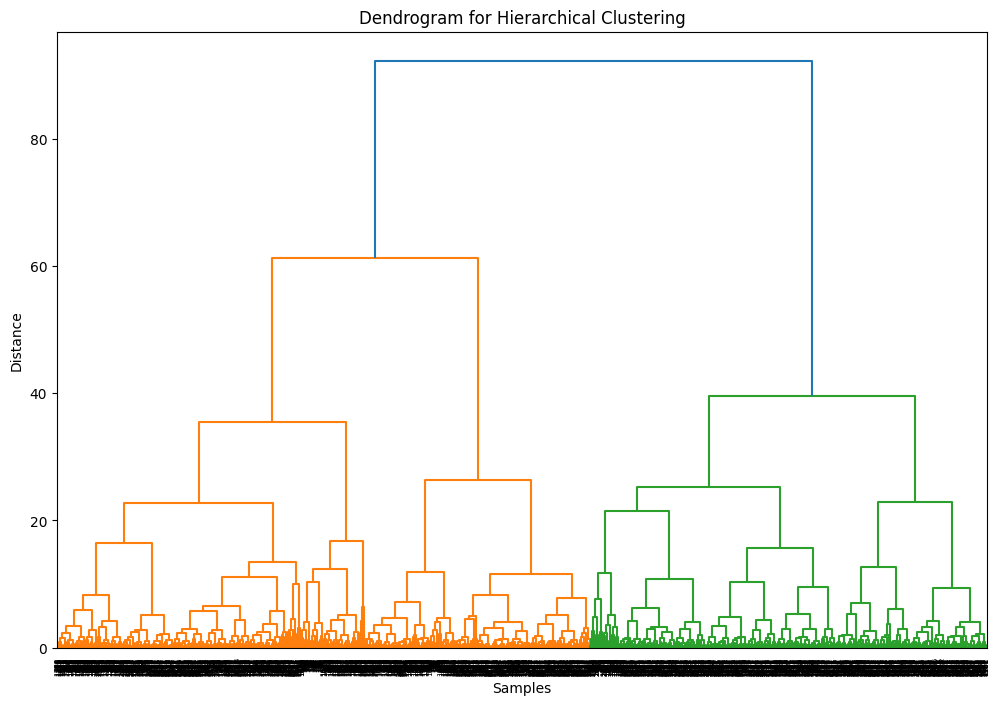

In [10]:
# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()